In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [10]:
x_train = x_train /255.0
x_test = x_test/255.0

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
#Data is 2D conv expects h*w*c
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
x_train.shape

(60000, 28, 28, 1)

In [15]:
K = len(set(y_train))
print('No. of Classes:' , K)

No. of Classes: 10


In [17]:
# Build Model using Functional API

i = Input(shape=x_train[0].shape)
x= Conv2D(32,(3,3),strides=2,activation='relu')(i)
x= Conv2D(64,(3,3),strides=2,activation='relu')(x)
x= Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x= Dense(512, activation='relu')(x)
x= Dropout(0.2)(x)
x=Dense(K,activation = 'softmax')(x)

model = Model(i,x)

In [18]:
model.compile(optimizer='adam',
             loss= 'sparse_categorical_crossentropy',
             metrics= ['accuracy'])
r = model.fit(x_train, y_train, validation_data =(x_test,y_test),epochs=15)


Epoch 1/15
1875/1875 [==============================] - 55s 30ms/step - loss: 0.5255 - accuracy: 0.8057 - val_loss: 0.3941 - val_accuracy: 0.8483
Epoch 2/15
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3672 - accuracy: 0.8620 - val_loss: 0.3604 - val_accuracy: 0.8645
Epoch 3/15
1875/1875 [==============================] - 48s 25ms/step - loss: 0.3174 - accuracy: 0.8810 - val_loss: 0.3330 - val_accuracy: 0.8761
Epoch 4/15
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2845 - accuracy: 0.8930 - val_loss: 0.3451 - val_accuracy: 0.8708
Epoch 5/15
1875/1875 [==============================] - 52s 27ms/step - loss: 0.2571 - accuracy: 0.9029 - val_loss: 0.3015 - val_accuracy: 0.8886
Epoch 6/15
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2359 - accuracy: 0.9103 - val_loss: 0.2890 - val_accuracy: 0.8961
Epoch 7/15
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2185 - accuracy: 0.9178 - val_loss: 0.3002 -

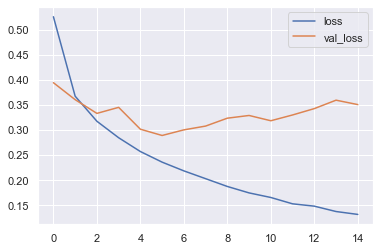

In [19]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

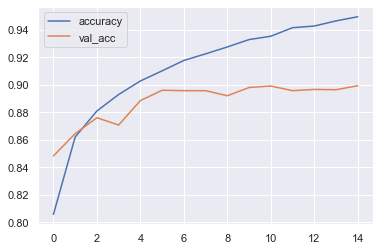

In [20]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

Confusion matrix without normalization
[[848   3  24  13   4   1 103   0   4   0]
 [  0 978   1  14   3   0   4   0   0   0]
 [ 16   1 815  10  74   0  84   0   0   0]
 [  8  11  17 893  46   0  24   0   1   0]
 [  0   1  31  16 886   0  64   0   2   0]
 [  1   0   0   0   0 958   0  30   3   8]
 [100   0  47  25 107   1 714   0   6   0]
 [  0   0   0   0   0   5   0 965   0  30]
 [  1   1   4   2   8   1   9   2 971   1]
 [  0   0   0   0   0   5   1  28   0 966]]


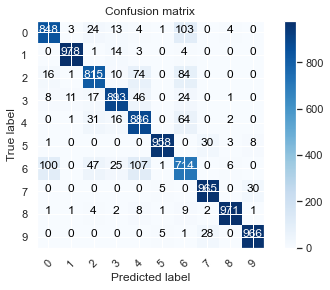

In [21]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',
                         cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix without normalization')
    
    print(cm)
    
    plt.imshow(cm, interpolation= 'nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    fmt = '2f' if normalize else 'd'
    thresh =cm.max() /2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j],fmt),
                 horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))
    

In [22]:
labels= '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

Text(0.5, 1.0, 'True label: Dress Predicted: Shirt')

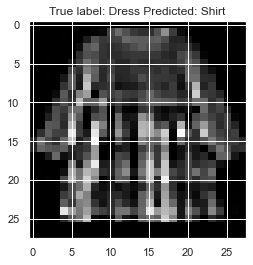

In [27]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title('True label: %s Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]))